In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv")
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


<div style="background-color:#F5F5DC; color:#FF7F50; font-size:25px; padding:25px; text-align:center; border-radius:15px;">Mobile Device Usage & Battery Draining</div>

In [2]:
df['Operating System'].value_counts()

Operating System
Android    554
iOS        146
Name: count, dtype: int64

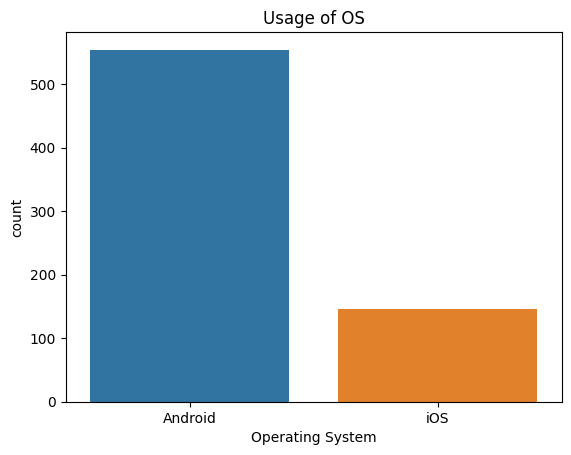

In [3]:
sns.countplot(x=df['Operating System'])
plt.xlabel("Operating System")
plt.title("Usage of OS")
plt.show()

<Axes: xlabel='User Behavior Class', ylabel='count'>

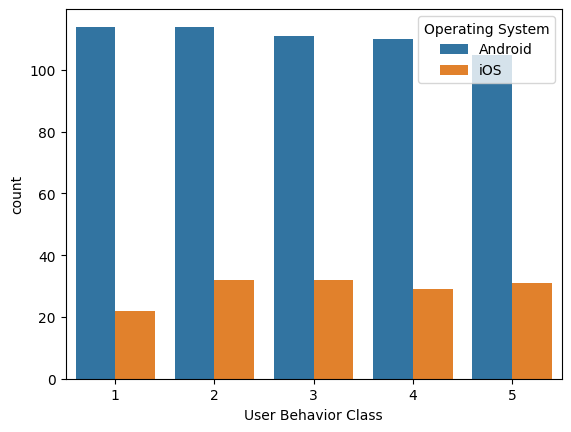

In [4]:
sns.countplot(x=df['User Behavior Class'],hue=df['Operating System'])

<Axes: xlabel='User Behavior Class', ylabel='count'>

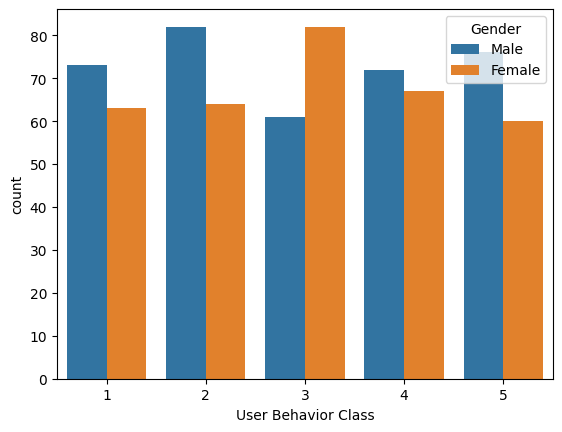

In [5]:
sns.countplot(x=df['User Behavior Class'],hue=df['Gender'])